<a href="https://colab.research.google.com/github/JoeHannemannUD/W23-GEOG271/blob/main/HW5_GIS_Data_Manipulation_Joe_Hannemann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install folium
!apt install python3-rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state

In [2]:
#importing libraries
# interacting with hosting site
import urllib3
from bs4 import BeautifulSoup
# getting and reading files
import os
import glob
import pandas as pd
# geospatial analysis 
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
# Need to use matplotlib colormaps to map colors to variables' values
from matplotlib import cm
import matplotlib.pyplot as plt

In [4]:
ct_shape = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [5]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      2165 non-null   object  
 1   shape_area   2165 non-null   object  
 2   ntaname      2165 non-null   object  
 3   shape_leng   2165 non-null   object  
 4   boro_name    2165 non-null   object  
 5   puma         2165 non-null   object  
 6   ct2010       2165 non-null   object  
 7   boro_code    2165 non-null   object  
 8   cdeligibil   2164 non-null   object  
 9   boro_ct2010  2165 non-null   object  
 10  ctlabel      2165 non-null   object  
 11  geometry     2165 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 203.1+ KB


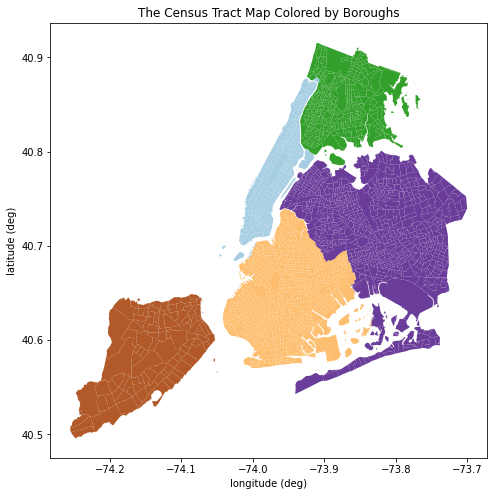

In [6]:
#Geo-visualizating the census tracts data
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("longitude (deg)")
ax.set_ylabel("latitude (deg)")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("The Census Tract Map Colored by Boroughs");

In [7]:
#Converting the degrees into US feet. 
ct_shape = ct_shape.to_crs("EPSG:2263")
ct_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

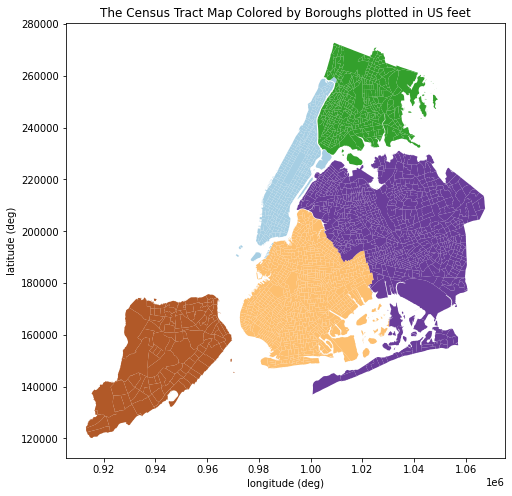

In [10]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("longitude (deg)")
ax.set_ylabel("latitude (deg)")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("The Census Tract Map Colored by Boroughs plotted in US feet");

In [8]:
#Creating a new column in the data and convert the area geometry into square miles
ct_shape["shape_areami2"] = ct_shape.geometry.area * 3.587e-8
ct_shape

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,shape_areami2
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288....",0.089568
1,MN19,1906016.47074,Turtle Bay-East Midtown,5534.20030845,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005....",0.068369
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091....",0.066754
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199....",0.066883
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517....",0.067827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN72,7595222.96542,Steinway,15137.0331772,Queens,4101,031700,4,I,4031700,317,"MULTIPOLYGON (((1014204.890 222262.789, 101422...",0.272440
2161,BK95,2332264.0357,Erasmus,6106.75671502,Brooklyn,4010,079200,3,E,3079200,792,"MULTIPOLYGON (((997667.512 173566.353, 997398....",0.083658
2162,BK95,2391961.65558,Erasmus,6265.76293199,Brooklyn,4010,079400,3,I,3079400,794,"MULTIPOLYGON (((997556.443 174916.108, 997380....",0.085800
2163,BK79,1253234.96366,Ocean Hill,6138.95805805,Brooklyn,4007,036502,3,E,3036502,365.02,"MULTIPOLYGON (((1011245.231 185499.827, 101121...",0.044954


In [18]:
ct_shape["shape_areami2"]

0       0.089568
1       0.068369
2       0.066754
3       0.066883
4       0.067827
          ...   
2160    0.272440
2161    0.083658
2162    0.085800
2163    0.044954
2164    0.072620
Name: shape_areami2, Length: 2165, dtype: float64

In [20]:
NYC_Area = ct_shape.eval("shape_areami2").sum()
print ('total NYC land area: {:.0f} (mi^2)'.format(NYC_Area)) # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302 (mi^2)
